In [14]:
# This cell is from the template notebook. It contains ipython magic and 
# various useful imports which are commonly used in this app.

%load_ext autoreload
%autoreload 2

import pandas as pd
import datetime
import numpy as np
import os
from acoustic_data_science import config, helpers
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
feather_paths = helpers.get_feather_paths(config.processed_data_path)
feather_paths

['/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_08.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_09.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_10.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_11.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2018_12.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_01.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_02.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_03.feather',
 '/Users/georgeamccarthy/Documents/workspace/mphys/acoustic-data-science/data/processed/2019_04.feather',
 '/Users/georgeamccarthy/Documents/workspace/m

In [52]:
df_generator = (pd.read_feather(feather_path, columns=['timestamp', 'broadband_spl', 'background_spl']) for feather_path in feather_paths)
df = pd.concat(df_generator, ignore_index=True)
df.to_feather(path=os.path.join(config.processed_data_path, 'whole_year', 'whole_year.feather'))

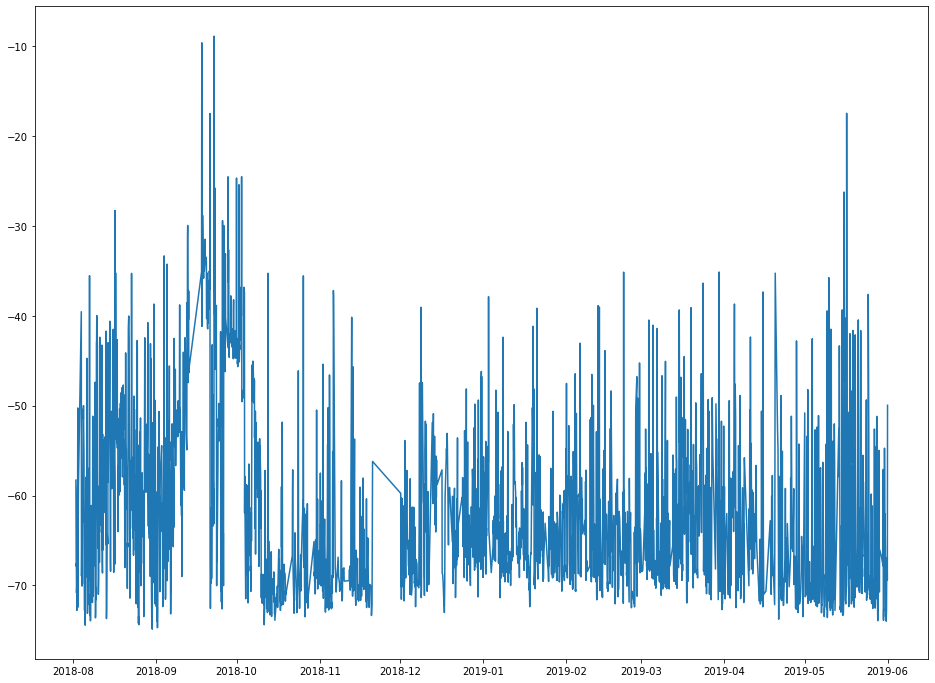

In [17]:
plt.figure(figsize=(16,12))
step = 10000
t = df['timestamp'][::step]
y = df['broadband_spl'][::step]
plt.plot(t, y)
plt.show()

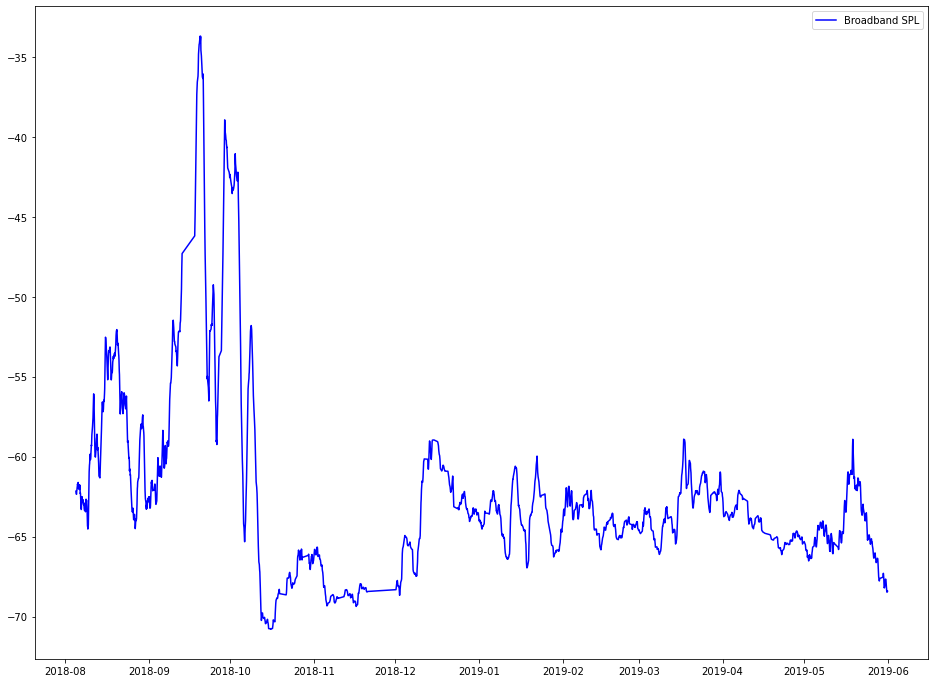

In [47]:
averaging_window = 2 * 60 * 60 * 24 * 2
rolling_mean = df['broadband_spl'].rolling(averaging_window).mean()
rolling_mean_not_null = rolling_mean.notnull()
rolling_mean = rolling_mean[rolling_mean_not_null]

plt.figure(figsize=(16,12))

step = 10000

t = df['timestamp'][rolling_mean_not_null]
y = rolling_mean
plt.plot(t[::step], y[::step], 'b-', label='Broadband SPL')

plt.legend()
plt.show()